In [1]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import time
import torch
from feedforward import DQNAgent
import pylab as plt
# %matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import hockey.hockey_env as h_env
print("hi")

hi


## Helper Functions

In [2]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [3]:
# class DiscreteActionWrapper(gym.ActionWrapper):
#     def __init__(self, env: gym.Env, bins = 5):
#         """A wrapper for converting a 1D continuous actions into discrete ones.
#         Args:
#             env: The environment to apply the wrapper
#             bins: number of discrete actions
#         """
#         assert isinstance(env.action_space, spaces.Box)
#         super().__init__(env)
#         self.bins = bins
#         self.orig_action_space = env.action_space
#         self.action_space = spaces.Discrete(self.bins)

#     def action(self, action):
#         """ discrete actions from low to high in 'bins'
#         Args:
#             action: The discrete action
#         Returns:
#             continuous action
#         """
#         return self.orig_action_space.low + action/(self.bins-1.0)*(self.orig_action_space.high-self.orig_action_space.low)  

## Test in Env

In [4]:
# env_name = 'Pendulum-v1'
env_name = 'CartPole-v0'
env = gym.make(env_name)

# env = h_env.HockeyEnv()

# if isinstance(env.action_space, spaces.Box):
#     print("Discretizing actions")
#     env = DiscreteActionWrapper(env,5)

ac_space = env.action_space
o_space = env.observation_space
print(ac_space)
print(o_space)

Discrete(2)
Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)


/Users/snath/Nextcloud/Documents/PhD/Courses/RL/RL_project/.env_RL_course/lib/python3.12/site-packages/gymnasium/envs/registration.py:517: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


In [5]:
# env_ = gym.make(env_name, render_mode="human")
# observation = env_.reset()

# # Run for a few steps
# for _ in range(50):  # Adjust steps as needed
#     env_.render()  # Render the environment
#     action = env_.action_space.sample()  # Choose a random action (0 or 1)
#     observation, reward, done, _, _ = env_.step(action)  # Take a step
    
#     if done:
#         observation = env_.reset()  # Reset if the episode ends

# env_.close()  # Close the environment

Train the agent!

In [6]:
q_agent = DQNAgent(o_space, ac_space, eps=0.2, update_Qt_after=20, PrioritizedMemory=False)

episode_rewards = []
cum_mean_episode_rewards = []
losses = []
max_episodes = 10000
max_steps = 500 
printevery = 500
num_stored = 0
for i in range(max_episodes):
    # print(f"Starting episode {i+1}")
    ob, _info = env.reset()
    total_reward = 0
    
    for t in range(max_steps):   
        a = q_agent.act(ob)
        (ob_new, reward, done, trunc, _info) = env.step(a)

        total_reward += reward
        q_agent.store_transition((ob, a, reward, ob_new, done))            
        num_stored += 1
        ob=ob_new        

        if done: 
            break

    # print(f"Episode {i+1} ended after {t+1} steps. Episode reward = {total_reward}")

    episode_rewards.append(total_reward)
    cum_mean_episode_rewards.append(np.mean(episode_rewards[-printevery:]))
    losses.append(np.mean(q_agent.train(1)))
    
    if((i+1)%printevery==0):
        print(f"{i+1} episodes completed: Mean cumulative reward: {np.mean(episode_rewards[-printevery:])}")

500 episodes completed: Mean cumulative reward: 10.544
1000 episodes completed: Mean cumulative reward: 10.414
1500 episodes completed: Mean cumulative reward: 16.534
2000 episodes completed: Mean cumulative reward: 29.58
2500 episodes completed: Mean cumulative reward: 49.482
3000 episodes completed: Mean cumulative reward: 44.412
3500 episodes completed: Mean cumulative reward: 37.832
4000 episodes completed: Mean cumulative reward: 40.24
4500 episodes completed: Mean cumulative reward: 113.454
5000 episodes completed: Mean cumulative reward: 57.472
5500 episodes completed: Mean cumulative reward: 85.172
6000 episodes completed: Mean cumulative reward: 136.88
6500 episodes completed: Mean cumulative reward: 132.174
7000 episodes completed: Mean cumulative reward: 146.618
7500 episodes completed: Mean cumulative reward: 152.586
8000 episodes completed: Mean cumulative reward: 157.448
8500 episodes completed: Mean cumulative reward: 170.732
9000 episodes completed: Mean cumulative rewa

In [10]:
q_agent = DQNAgent(o_space, ac_space, eps=0.2, update_Qt_after=20, PrioritizedMemory=True)

episode_rewards2 = []
cum_mean_episode_rewards2 = []
losses2 = []
max_episodes = 10000
max_steps = 500 
printevery = 500
num_stored = 0
for i in range(max_episodes):
    # print(f"Starting episode {i+1}")
    ob, _info = env.reset()
    total_reward = 0
    
    for t in range(max_steps):   
        a = q_agent.act(ob)
        (ob_new, reward, done, trunc, _info) = env.step(a)

        total_reward += reward
        q_agent.store_transition((ob, a, reward, ob_new, done))            
        num_stored += 1
        ob=ob_new        

        if done: 
            break

    # print(f"Episode {i+1} ended after {t+1} steps. Episode reward = {total_reward}")

    episode_rewards2.append(total_reward)
    cum_mean_episode_rewards2.append(np.mean(episode_rewards2[-printevery:]))
    losses2.append(np.mean(q_agent.train(1)))
    
    if((i+1)%printevery==0):
        print(f"{i+1} episodes completed: Mean cumulative reward: {np.mean(episode_rewards2[-printevery:])}")

/Users/snath/Nextcloud/Documents/PhD/Courses/RL/RL_project/feedforward.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weights = torch.tensor(weights, device=device, dtype=torch.float32)


500 episodes completed: Mean cumulative reward: 10.522
1000 episodes completed: Mean cumulative reward: 11.59
1500 episodes completed: Mean cumulative reward: 24.35
2000 episodes completed: Mean cumulative reward: 17.644
2500 episodes completed: Mean cumulative reward: 75.15
3000 episodes completed: Mean cumulative reward: 114.188
3500 episodes completed: Mean cumulative reward: 123.436
4000 episodes completed: Mean cumulative reward: 123.698
4500 episodes completed: Mean cumulative reward: 95.336
5000 episodes completed: Mean cumulative reward: 68.508
5500 episodes completed: Mean cumulative reward: 59.178
6000 episodes completed: Mean cumulative reward: 88.912
6500 episodes completed: Mean cumulative reward: 183.092
7000 episodes completed: Mean cumulative reward: 219.602
7500 episodes completed: Mean cumulative reward: 255.348
8000 episodes completed: Mean cumulative reward: 317.502
8500 episodes completed: Mean cumulative reward: 426.032
9000 episodes completed: Mean cumulative rew

Plot the training reward over time. Use the running_mean(array, window_size) to plot a smooth version 

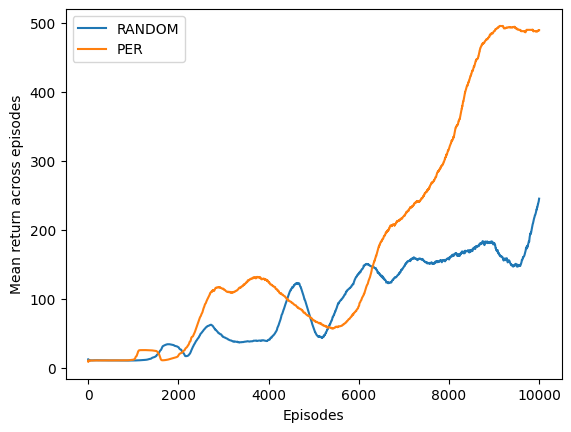

In [11]:
plt.plot(cum_mean_episode_rewards, label="RANDOM")
plt.plot(cum_mean_episode_rewards2, label="PER")
plt.xlabel("Episodes")
plt.ylabel("Mean return across episodes")
plt.legend()

Text(0, 0.5, 'Episode Return')

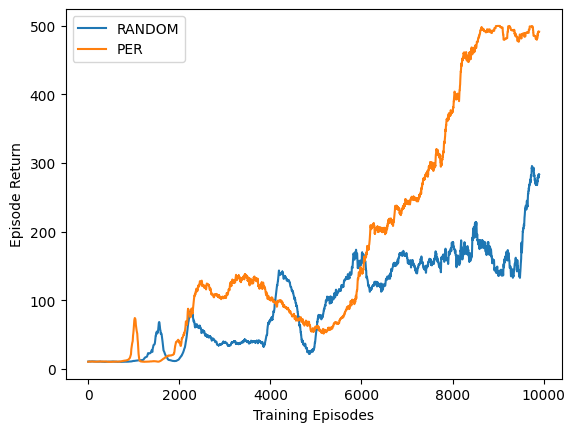

In [14]:
# plt.plot(episode_rewards, label="return")
plt.plot(running_mean(episode_rewards,100), label="RANDOM")
plt.plot(running_mean(episode_rewards2,100), label="PER")
plt.legend()
plt.xlabel("Training Episodes")
plt.ylabel("Episode Return")

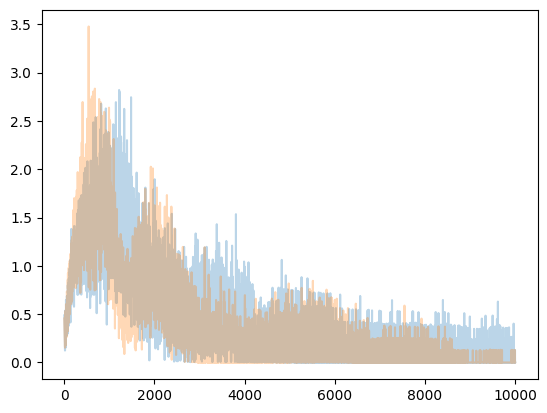

In [13]:
plt.figure()
plt.plot(losses, alpha=0.3)
plt.plot(losses2, alpha=0.3)

## Evaluate (without exploration)

Please look at the behavior for a small number of episodes

In [15]:
env_eval = gym.make(env_name, render_mode="human")
# if isinstance(env.action_space, spaces.Box):
#     env_eval = DiscreteActionWrapper(env_eval,5)


test_stats = []
episodes=50
env_ = env    # without rendering
# env_ = env_eval # with rendering

for i in range(episodes):
    total_reward = 0
    ob, _info = env_.reset()
    for t in range(max_steps):
        done = False        
        a = q_agent.act(ob, eps=0.0)
        (ob_new, reward, done, trunc, _info) = env_.step(a)
        total_reward+= reward
        ob=ob_new        
        if done: break    
    test_stats.append([i,total_reward,t+1])        

/Users/snath/Nextcloud/Documents/PhD/Courses/RL/RL_project/.env_RL_course/lib/python3.12/site-packages/gymnasium/envs/registration.py:517: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


In [16]:
test_stats_np = np.array(test_stats)
print(np.mean(test_stats_np[:,1]), "+-", np.std(test_stats_np[:,1]))

500.0 +- 0.0


In [17]:
env_eval = gym.make(env_name, render_mode="human")
# if isinstance(env.action_space, spaces.Box):
#     env_eval = DiscreteActionWrapper(env_eval,5)


test_stats = []
episodes=10
# env_ = env    # without rendering
env_ = env_eval # with rendering

for i in range(episodes):
    total_reward = 0
    ob, _info = env_.reset()
    for t in range(max_steps):
        done = False        
        a = q_agent.act(ob, eps=0.0)
        (ob_new, reward, done, trunc, _info) = env_.step(a)
        total_reward+= reward
        ob=ob_new        
        if done: break    
    test_stats.append([i,total_reward,t+1])        

Evaluate mean and standard deviation of performance 

(for the Pendulum: an average return around -30 or better should be achieved)

(for the CartPendulum it is possible to get 200)

# Visualize

Visualization of the value function.

In [ ]:
Adapt the value_function plotting from last time to plot the maxQ value

## Pendulum Env

Observation space:

0 angle

1 angular velocity

Do that for the pendulum function. Does it look like you expect?

Do that for the pendulum function. Does it look like you expect

## Cartpole Env

Observation space:
 
0       Cart Position             -4.8                    4.8

1       Cart Velocity             -Inf                    Inf

2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)

3       Pole Angular Velocity     -Inf                    Inf

Try to adapt the plotting function that it also works in higher input spaces where all other inputs are 0

In [ ]:
figQ = plot_Q_function_generic(q_agent.Q, input_dims=o_space.shape[0], plot_dim1=0, plot_dim2=2, 
                       label_dim1="Cart Pos", label_dim2="Pole Angle")

In [ ]:
figQ = plot_Q_function_generic(q_agent.Q, input_dims=o_space.shape[0], plot_dim1=0, plot_dim2=1, 
                       label_dim1="Cart Pos", label_dim2="Cart Vel")

In [ ]:
figQ = plot_Q_function_generic(q_agent.Q, input_dims=o_space.shape[0], plot_dim1=2, plot_dim2=3, 
                       label_dim1="Pol Angle", label_dim2="Pole Vel")

In [ ]:
# env_name = 'Acrobot-v1'
# env_name = 'MountainCar-v0'
# env_name = 'LunarLander-v2'